In [1]:
import os

cwd = os.getcwd()
Data_Folder = cwd + '\data\Demo5Files'

print(Data_Folder)

C:\Users\leeys\Desktop\workspace\文本分析\data\Demo5Files


In [2]:
from os import walk # 文件走訪
from os.path import join # 路徑合併

file_list = list()

for root, dirs, files in walk(Data_Folder):
    for file in files:
        file = join(root, file)
        print(file)
        file_list.append(file)

C:\Users\leeys\Desktop\workspace\文本分析\data\Demo5Files\国际\2.txt
C:\Users\leeys\Desktop\workspace\文本分析\data\Demo5Files\国际\3.txt
C:\Users\leeys\Desktop\workspace\文本分析\data\Demo5Files\娱乐\1.txt
C:\Users\leeys\Desktop\workspace\文本分析\data\Demo5Files\社会\4.txt
C:\Users\leeys\Desktop\workspace\文本分析\data\Demo5Files\社会\5.txt


In [3]:
import codecs        

## load news ##
all_news = list()
category = list()

for file in file_list:
    with codecs.open(file, 'r', encoding='utf-8') as news:
        all_news.append(news.read())
        category.append(file.split('\\')[-2]) #-2為類別層  ex:XXX/娛樂/0.txt  

print(all_news)
print(category)

['美国国防部发言人威廉斯说，伊拉克仍持续将五艘共约载有万桶原油的超级油轮，与距科威特海岸五公里处的海岛石油转运站的原油倾入北波斯湾。美国和沙特阿拉伯军方说，伊拉克已连续第四天将原油倾入波斯湾。威廉斯说，伊拉克故意将油漏出波斯湾。伊拉克则指控，漏油是因多国部队轰炸两艘油轮而引起。环保专家说，一场环保灾难已经发生。', '波斯湾战事引发原油外泄后，波斯湾沙特阿拉伯海岸，廿六日平静的海面，闪着发亮的层层油污，大批被原油覆身的海鸟，停在海岸，因油污而寸步难行，无法展翅起飞，生态灾难令人怵目惊心。廿六日晚间，原油已流往科威特巿南方一百廿公里附近的卡夫吉。', '继吉田荣作和织田裕二之后，日本演艺圈又多了一个难得的男偶像明星，那就是加势大周。只要在日本有看过可囗可乐广告的观众朋友一定对他留下了深刻的印象。其实在拍这支广告前他已经在模特儿行业中待过一阵子了，但是机运一直不是很好。好的人才老天是不会埋没的，可囗可乐这支广告终于使他变成了日本家喻户晓的人物。广告的魅力之大可想而知！', '新世航一号渔船上的我国籍船员绰号「黑道」游闻道和「白道」吕姓少年，在喋血案之前，因不堪船上干部凌虐，曾跳海逃生后被救起，并被船长强迫立下「悔过书」。项目人员指出，游闻道、吕政道跳海被救起的隔日，即发生喋血案，因此两事件应有某种程度的关联性。', '侦办新世航渔船喋血案的项目人员指出，渔船上的厨师刘宪助经初步调查，可能是船上唯一未参与两次喋血案的人员。且刘宪助后来补记的「新世航日记」对整个案情的侦办上有重要的参考价值。']
['国际', '国际', '娱乐', '社会', '社会']


In [4]:
import jieba
import jieba.posseg as pseg

seg_POS_list = pseg.cut("承德市长江大桥")

for w,s in seg_POS_list:
    print(w + '/' + s + ' ', end = '')
    
print()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\leeys\AppData\Local\Temp\jieba.cache
Loading model cost 1.704 seconds.
Prefix dict has been built successfully.


承德市/ns 长江大桥/ns 


In [5]:
import jieba

## word segmentation ##
words_list = list()

for i in range(len(all_news)):
    word = list()
    line = all_news[i]
    
    result = pseg.cut(str(line)) 
    
    for w,s in result:
        print(w + '/' + s, end=' ')
        word.append(w)
    
    words_list.append(word)
    
    print()
    print('-' * 40)

美国国防部/nt 发言人/l 威廉斯/nrt 说/v ，/x 伊拉克/nrt 仍/zg 持续/vd 将/d 五艘/m 共/d 约/d 载有/b 万桶/m 原油/n 的/uj 超级/b 油轮/n ，/x 与/p 距/n 科威特/nr 海岸/s 五公里/m 处/n 的/uj 海岛/ns 石油/n 转运站/n 的/uj 原油/n 倾入/v 北/ns 波斯湾/ns 。/x 美国/ns 和/c 沙特阿拉伯/ns 军方/n 说/v ，/x 伊拉克/nrt 已/d 连续/a 第四天/m 将/d 原油/n 倾入/v 波斯湾/ns 。/x 威廉斯/nrt 说/v ，/x 伊拉克/nrt 故意/d 将油/n 漏出/v 波斯湾/ns 。/x 伊拉克/nrt 则/d 指控/vn ，/x 漏油/n 是/v 因/c 多国部队/n 轰炸/v 两艘/m 油轮/n 而/c 引起/v 。/x 环保/j 专家/n 说/v ，/x 一场/m 环保/j 灾难/n 已经/d 发生/v 。/x 
----------------------------------------
波斯湾/ns 战事/n 引发/v 原油/n 外泄/v 后/f ，/x 波斯湾/ns 沙特阿拉伯/ns 海岸/s ，/x 廿六日/m 平静/a 的/uj 海面/n ，/x 闪/v 着/uz 发亮/v 的/uj 层层/n 油污/n ，/x 大批/m 被/p 原油/n 覆身/v 的/uj 海鸟/n ，/x 停/v 在/p 海岸/s ，/x 因/p 油污/n 而/c 寸步难行/i ，/x 无法/n 展翅/v 起飞/v ，/x 生态灾难/l 令人/nrt 怵目惊心/i 。/x 廿六日/m 晚间/t ，/x 原油/n 已/d 流往/vn 科威特/nr 巿/zg 南方/f 一百/m 廿/m 公里/q 附近/f 的/uj 卡夫/nrt 吉/nr 。/x 
----------------------------------------
继/vg 吉田荣/nr 作/v 和/c 织田裕二/ns 之后/f ，/x 日本/ns 演艺圈/n 又/d 多/m 了/ul 一个/m 难得/d 的/uj 男/n 偶像/n 明星/nr ，/x 那/r 就是/d 加势/n 大周/n 。/x 只要/c 在/p 日本/ns 有/v 看过/v 可/v 囗/zg 可乐/a 广告/n 

In [6]:
import jieba

jieba.add_word('吉田荣作', tag='nr')

## load user dictionary ##
user_dict_path = cwd + '\\data\\userdict_p.txt'
jieba.load_userdict(user_dict_path)

## word segmentation ##
words_list = list()

for i in range(len(all_news)):
    word = list()
    line = all_news[i]
    
    result = pseg.cut(str(line)) 
    
    for w,s in result:
        print(w + '/' + s, end=' ')
        word.append(w)
    
    words_list.append(word)
    
    print()
    print('-' * 40)

美国国防部/nt 发言人/l 威廉斯/nrt 说/v ，/x 伊拉克/nrt 仍/zg 持续/vd 将/d 五艘/m 共/d 约/d 载有/b 万桶/m 原油/n 的/uj 超级/b 油轮/n ，/x 与/p 距/n 科威特/nr 海岸/s 五公里/m 处/n 的/uj 海岛石油转运站/ns 的/uj 原油/n 倾入/v 北波斯湾/ns 。/x 美国/ns 和/c 沙特阿拉伯/ns 军方/n 说/v ，/x 伊拉克/nrt 已/d 连续/a 第四天/m 将/d 原油/n 倾入/v 波斯湾/ns 。/x 威廉斯/nrt 说/v ，/x 伊拉克/nrt 故意/d 将油/n 漏出/v 波斯湾/ns 。/x 伊拉克/nrt 则/d 指控/vn ，/x 漏油/n 是/v 因/c 多国部队/n 轰炸/v 两艘/m 油轮/n 而/c 引起/v 。/x 环保/j 专家/n 说/v ，/x 一场/m 环保/j 灾难/n 已经/d 发生/v 。/x 
----------------------------------------
波斯湾/ns 战事/n 引发/v 原油/n 外泄/v 后/f ，/x 波斯湾/ns 沙特阿拉伯/ns 海岸/s ，/x 廿六日/m 平静/a 的/uj 海面/n ，/x 闪/v 着/uz 发亮/v 的/uj 层层/n 油污/n ，/x 大批/m 被/p 原油/n 覆身/v 的/uj 海鸟/n ，/x 停/v 在/p 海岸/s ，/x 因/p 油污/n 而/c 寸步难行/i ，/x 无法/n 展翅起飞/i ，/x 生态灾难/l 令人/nrt 怵目惊心/i 。/x 廿六日/m 晚间/t ，/x 原油/n 已/d 流往/vn 科威特/nr 巿/zg 南方/f 一百廿公里/m 附近/f 的/uj 卡夫吉/ns 。/x 
----------------------------------------
继/v 吉田荣作/nr 和/c 织田裕二/ns 之后/f ，/x 日本/ns 演艺圈/n 又/d 多/m 了/ul 一个/m 难得/d 的/uj 男/n 偶像/n 明星/nr ，/x 那/r 就是/d 加势大周/nr 。/x 只要/c 在/p 日本/ns 有/v 看过/v 可囗可乐/nz 广告/n 的/uj 观众/n 朋友/n 一定/d 对/p 他/r 留下/v 了/u

In [7]:
import jieba

## load user dictionary ##
user_dict_path = cwd + '\\data\\userdict_p.txt'
jieba.load_userdict(user_dict_path)
    
## load stop words ##
stop_words_path = cwd + '\\data\\stop_words.txt'

stop_words = set()

with open(stop_words_path,'r',encoding='utf-8') as sw:
    [stop_words.add(line.strip()) for line in sw.readlines()] #list Comprehension

stop_words.add('，');
stop_words.add('。');
stop_words.add('说');
stop_words.add('约');
stop_words.add('处');

jieba.suggest_freq(('中', '待'), True)

# subject = ['ng','n','nr','ns','nt','nz','ag','a','ad','an','d','dg','e','v','vg','vd','vn','x']

## word segmentation ##
words_list = list()

for i in range(len(all_news)):
    word = list()
    line = all_news[i]
    
    result = pseg.cut(str(line)) 
    
    for w,s in result:
        if w not in stop_words and s[0] == 'n':
            word.append(w)
            print(w + '/' + s, end=' ')
    
    words_list.append(' '.join(word))
    
    print()
    print('-' * 40)

美国国防部/nt 威廉斯/nrt 伊拉克/nrt 原油/n 油轮/n 科威特/nr 海岛石油转运站/ns 原油/n 北波斯湾/ns 美国/ns 沙特阿拉伯/ns 军方/n 伊拉克/nrt 原油/n 波斯湾/ns 威廉斯/nrt 伊拉克/nrt 将油/n 波斯湾/ns 伊拉克/nrt 漏油/n 多国部队/n 油轮/n 专家/n 灾难/n 
----------------------------------------
波斯湾/ns 战事/n 原油/n 波斯湾/ns 沙特阿拉伯/ns 海面/n 层层/n 油污/n 原油/n 海鸟/n 油污/n 令人/nrt 原油/n 科威特/nr 卡夫吉/ns 
----------------------------------------
吉田荣作/nr 织田裕二/ns 日本/ns 演艺圈/n 男/n 偶像/n 明星/nr 加势大周/nr 日本/ns 可囗可乐/nz 广告/n 观众/n 朋友/n 印象/n 广告/n 模特儿/n 行业/n 机运/n 人才/n 可囗可乐/nz 广告/n 日本/ns 人物/n 广告/n 魅力/n 
----------------------------------------
新世航一号/nz 渔船/n 国籍/n 船员/n 绰号/n 黑道/n 游闻道/nr 白道/n 吕姓/nr 喋血案/n 干部/n 船长/n 项目/n 人员/n 游闻道/nr 吕政道/nr 喋血案/n 事件/n 关联性/n 
----------------------------------------
新世航/nz 渔船/n 喋血案/n 项目/n 人员/n 渔船/n 厨师/n 刘宪助/nr 喋血案/n 人员/n 刘宪助/nr 补记/n 新世航日记/nz 案情/n 参考价值/n 
----------------------------------------


In [8]:
list1 = list()
list2 = list()
list3 = list()

for i in range(len(words_list)):
    if category[i] == '国际': list1.append(words_list[i])
    elif category[i] == '娱乐': list2.append(words_list[i])
    else: list3.append(words_list[i])

print(list1)
print(list2)
print(list3)

['美国国防部 威廉斯 伊拉克 原油 油轮 科威特 海岛石油转运站 原油 北波斯湾 美国 沙特阿拉伯 军方 伊拉克 原油 波斯湾 威廉斯 伊拉克 将油 波斯湾 伊拉克 漏油 多国部队 油轮 专家 灾难', '波斯湾 战事 原油 波斯湾 沙特阿拉伯 海面 层层 油污 原油 海鸟 油污 令人 原油 科威特 卡夫吉']
['吉田荣作 织田裕二 日本 演艺圈 男 偶像 明星 加势大周 日本 可囗可乐 广告 观众 朋友 印象 广告 模特儿 行业 机运 人才 可囗可乐 广告 日本 人物 广告 魅力']
['新世航一号 渔船 国籍 船员 绰号 黑道 游闻道 白道 吕姓 喋血案 干部 船长 项目 人员 游闻道 吕政道 喋血案 事件 关联性', '新世航 渔船 喋血案 项目 人员 渔船 厨师 刘宪助 喋血案 人员 刘宪助 补记 新世航日记 案情 参考价值']


['美国国防部', '威廉斯', '伊拉克', '原油', '油轮', '科威特', '海岛石油转运站', '原油', '北波斯湾', '美国', '沙特阿拉伯', '军方', '伊拉克', '原油', '波斯湾', '威廉斯', '伊拉克', '将油', '波斯湾', '伊拉克', '漏油', '多国部队', '油轮', '专家', '灾难', '波斯湾', '战事', '原油', '波斯湾', '沙特阿拉伯', '海面', '层层', '油污', '原油', '海鸟', '油污', '令人', '原油', '科威特', '卡夫吉']
[('原油', 6), ('伊拉克', 4), ('波斯湾', 4), ('威廉斯', 2), ('油轮', 2), ('科威特', 2), ('沙特阿拉伯', 2), ('油污', 2), ('美国国防部', 1), ('海岛石油转运站', 1), ('北波斯湾', 1), ('美国', 1), ('军方', 1), ('将油', 1), ('漏油', 1), ('多国部队', 1), ('专家', 1), ('灾难', 1), ('战事', 1), ('海面', 1), ('层层', 1), ('海鸟', 1), ('令人', 1), ('卡夫吉', 1)]


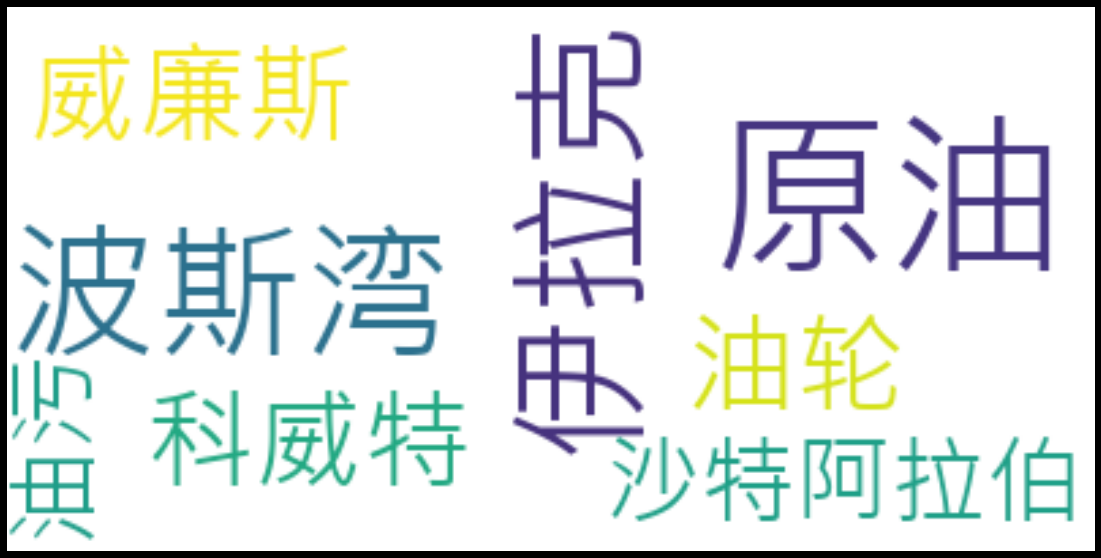

['吉田荣作', '织田裕二', '日本', '演艺圈', '男', '偶像', '明星', '加势大周', '日本', '可囗可乐', '广告', '观众', '朋友', '印象', '广告', '模特儿', '行业', '机运', '人才', '可囗可乐', '广告', '日本', '人物', '广告', '魅力']
[('广告', 4), ('日本', 3), ('可囗可乐', 2), ('吉田荣作', 1), ('织田裕二', 1), ('演艺圈', 1), ('男', 1), ('偶像', 1), ('明星', 1), ('加势大周', 1), ('观众', 1), ('朋友', 1), ('印象', 1), ('模特儿', 1), ('行业', 1), ('机运', 1), ('人才', 1), ('人物', 1), ('魅力', 1)]


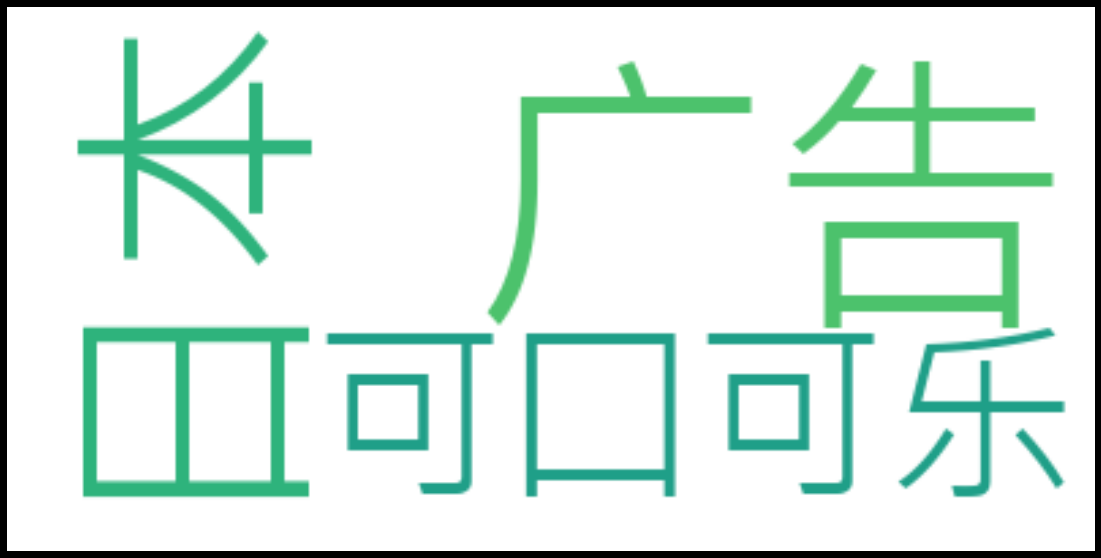

['新世航一号', '渔船', '国籍', '船员', '绰号', '黑道', '游闻道', '白道', '吕姓', '喋血案', '干部', '船长', '项目', '人员', '游闻道', '吕政道', '喋血案', '事件', '关联性', '新世航', '渔船', '喋血案', '项目', '人员', '渔船', '厨师', '刘宪助', '喋血案', '人员', '刘宪助', '补记', '新世航日记', '案情', '参考价值']
[('喋血案', 4), ('渔船', 3), ('人员', 3), ('游闻道', 2), ('项目', 2), ('刘宪助', 2), ('新世航一号', 1), ('国籍', 1), ('船员', 1), ('绰号', 1), ('黑道', 1), ('白道', 1), ('吕姓', 1), ('干部', 1), ('船长', 1), ('吕政道', 1), ('事件', 1), ('关联性', 1), ('新世航', 1), ('厨师', 1), ('补记', 1), ('新世航日记', 1), ('案情', 1), ('参考价值', 1)]


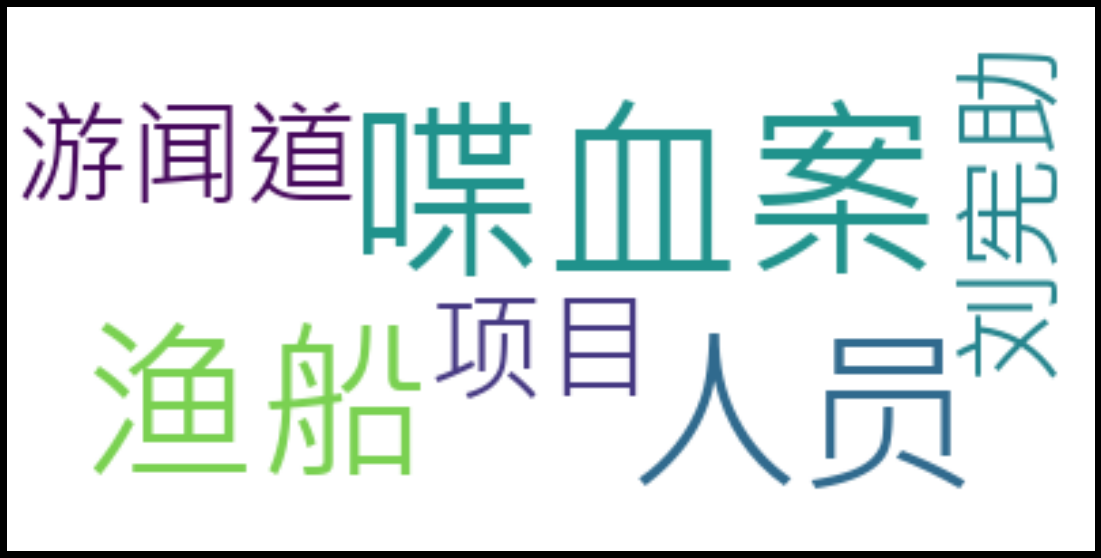

In [9]:
#pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter

# For 国际
terms = list()

for s in list1:
    terms.extend(s.split(' '))

print(terms)

print(sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True))

my_wordcloud = WordCloud(background_color="white", font_path='msjh.ttf', max_words = 100, collocations=False, margin=2) 
#my_wordcloud.generate_from_frequencies(Counter(terms))
my_wordcloud.generate_from_frequencies(frequencies={k:v for k,v in Counter(terms).items() if v > 1})

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# For 娱乐
terms = list()

for s in list2:
    terms.extend(s.split(' '))

print(terms)

print(sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True))

my_wordcloud = WordCloud(background_color="white", font_path='msjh.ttf', max_words = 100, collocations=False, margin=2) 
my_wordcloud.generate_from_frequencies(frequencies={k:v for k,v in Counter(terms).items() if v > 1})

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# For 社会
terms = list()

for s in list3:
    terms.extend(s.split(' '))

print(terms)

print(sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True))

my_wordcloud = WordCloud(background_color="white", font_path='msjh.ttf', max_words = 100, collocations=False, margin=2) 
my_wordcloud.generate_from_frequencies(frequencies={k:v for k,v in Counter(terms).items() if v > 1})

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()